In [2]:
import matplotlib.pyplot as plt
from load_data import *
import seaborn as sns

In [3]:
images, labels, label_map = load_dataset()
augmented_images, augmented_labels = augment_data(images, labels)

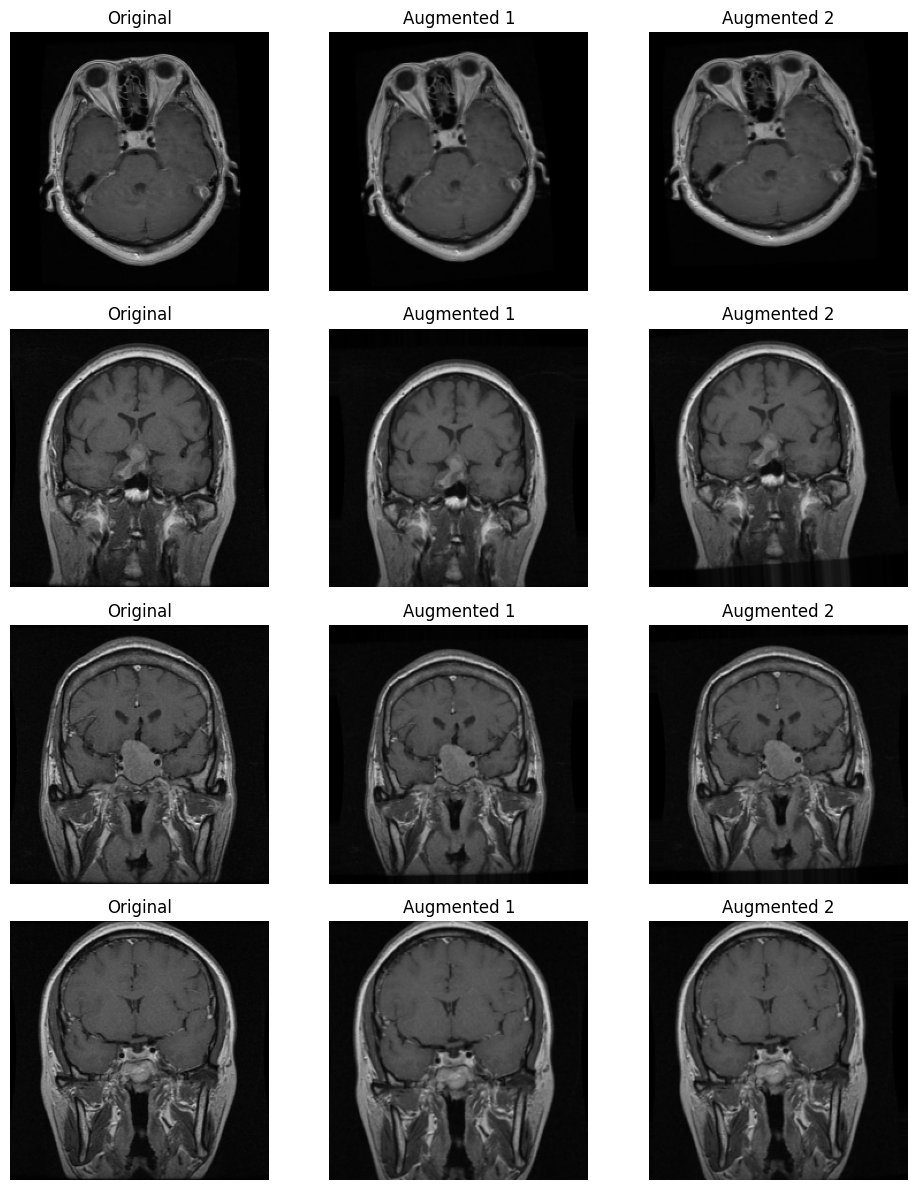

In [16]:
def visualize_images(original_images, augmented_images, n=4):
    fig, axes = plt.subplots(n, 3, figsize=(10, n * 3))
    
    for i in range(n):
        # Original image
        axes[i, 0].imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Original')
        axes[i, 0].axis('off')

        # Augmented image 1
        axes[i, 1].imshow(cv2.cvtColor(augmented_images[i * 3 + 1], cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title(f'Augmented 1')
        axes[i, 1].axis('off')

        # Augmented image 2
        axes[i, 2].imshow(cv2.cvtColor(augmented_images[i * 3 + 2], cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title(f'Augmented 2')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig('augmentation_example.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the images
visualize_images(images, augmented_images, n=4)

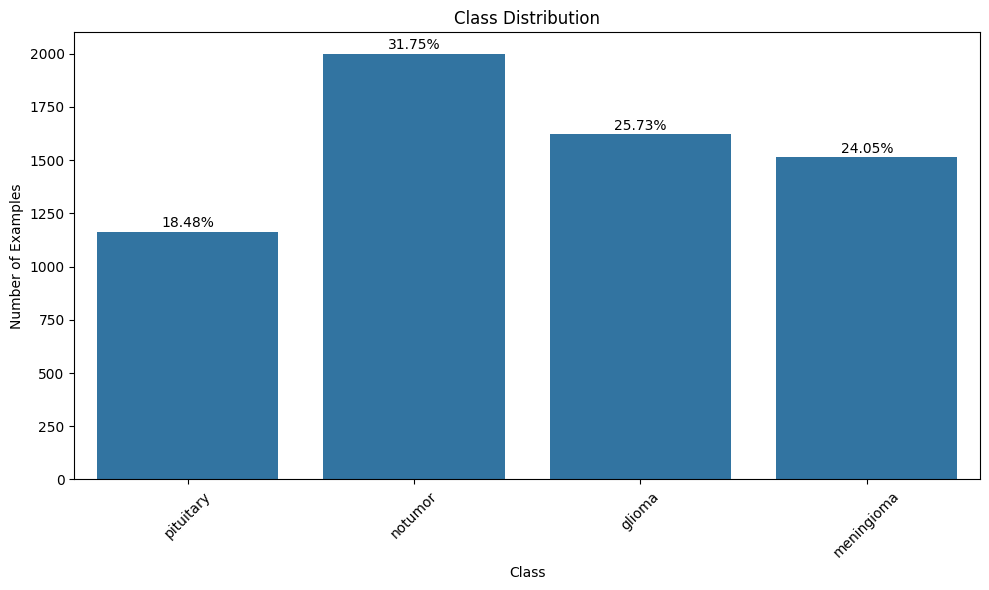

In [5]:
def visualize_class_distribution(labels, label_map):
    # Reverse the label map to get a mapping from index to class name
    idx_to_class = {v: k for k, v in label_map.items()}
    
    # Get the count of each class
    unique, counts = np.unique(labels, return_counts=True)
    class_counts = {idx_to_class.get(idx, idx): count for idx, count in zip(unique, counts)}
    total = sum(counts)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Examples')
    plt.xticks(rotation=45)
    
    # Annotate with percentage
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 20, '{:1.2f}%'.format(100 * height/total), ha="center") 
    
    plt.tight_layout()
    
    # Save the plot before showing it
    plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    


visualize_class_distribution(labels, label_map)

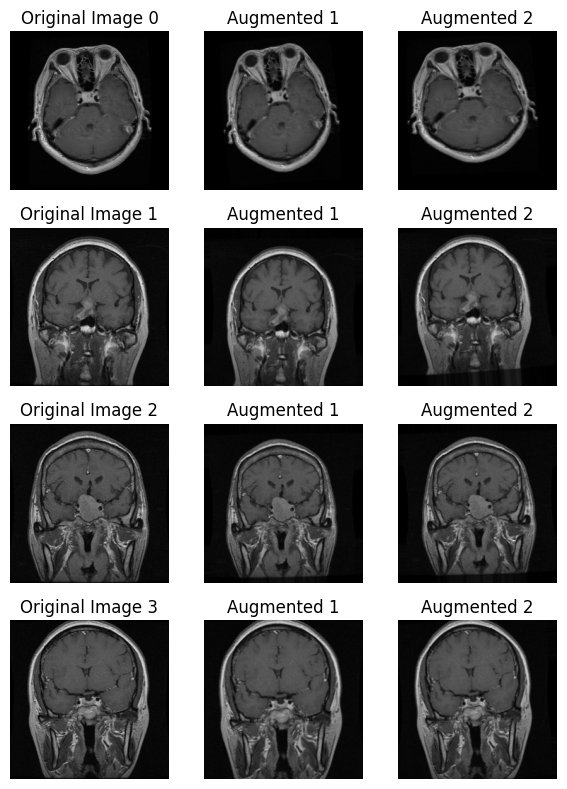

In [13]:
first_four_images = images[:4]
first_four_labels = labels[:4]

# Augment the first four images
augmented_images, augmented_labels = augment_data(first_four_images, first_four_labels, augmentations=2)

# Visualize the first four original images and their augmented versions
def visualize_augmentations(original_images, augmented_images):
    fig, axes = plt.subplots(len(original_images), 3, figsize=(6, 2 * len(original_images)))
    for i in range(len(original_images)):
        # Plot original image
        axes[i, 0].imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Original Image {i}')
        axes[i, 0].axis('off')
        
        # Plot augmented images
        for j in range(2):
            index = i * 3 + j + 1  # Calculate the index of augmented images
            axes[i, j+1].imshow(cv2.cvtColor(augmented_images[index], cv2.COLOR_BGR2RGB))
            axes[i, j+1].set_title(f'Augmented {j+1}')
            axes[i, j+1].axis('off')

    plt.tight_layout()
    plt.savefig('augmentation_example.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the images
visualize_augmentations(first_four_images, augmented_images)

6300